#**Customer Segmentation & Churn Prediction**

#Objective

The objective of this project is to analyze customer data from a telecom company to uncover patterns in customer behavior, segment customers based on shared characteristics, and predict customer churn using machine learning models. This enables the company to:

* Improve customer retention strategies
* Identify high-risk churn customers
* Personalize marketing campaigns
* Enhance customer satisfaction and lifetime value

The project follows a complete data science workflow — from data cleaning and exploratory analysis to predictive modeling and actionable business recommendations.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import SimpleImputer


## Data Understanding

* Loaded the telecom customer dataset into a pandas DataFrame
* Displayed the first few rows to get an overview of the data
* Reviewed the general structure and observed types of variables
* Identified the target variable (churn) and key features related to customer behavior
* Analyzed initial patterns and potential relationships between variables
* Noted the presence of categorical and numerical variables for further preprocessing



In [ ]:
# Loading the dataset
data = pd.read_csv('Telco_customer_churn 2.csv')

In [ ]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Inspect the dataset structure

* Checked the shape of the dataset (number of rows and columns)
* Displayed column names and data types
* Identified and counted missing values
* Reviewed unique values in each column
* Inspected summary statistics of numerical columns
* Checked for and removed duplicate rows


In [ ]:
print("Dataset Shape:", data.shape)

Dataset Shape: (7043, 33)


In [ ]:
print("\nSummary of Missing Values:\n", data.isnull().sum())


Summary of Missing Values:
 CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [ ]:
print("\nData Types:\n", data.dtypes)


Data Types:
 CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


## Data Preparation

* Handled missing values by imputing or dropping as appropriate
* Converted categorical variables to numerical format using encoding techniques (e.g., Label Encoding, One-Hot Encoding)
* Normalized or scaled numerical features to standardize value ranges (if required by model)
* Created new derived features for better predictive power
* Split the dataset into independent features (X) and target variable (y)
* Divided data into training and testing sets for model evaluation
* Ensured data consistency and removed any irrelevant or redundant columns

In [ ]:
# Converting 'Total Charges' to numeric, handling errors as NaN
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [ ]:
# Dropping rows with NaN in 'Total Charges' and handle 'Churn Reason' missing values by filling with 'Unknown'
data.dropna(subset=['Total Charges'], inplace=True)
data['Churn Reason'].fillna('Unknown', inplace=True)

<ipython-input-8-c674a07de376>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn Reason'].fillna('Unknown', inplace=True)


In [ ]:
# Encoding categorical columns (excluding 'CustomerID' which is unique for each customer)
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns.drop(['CustomerID']), drop_first=True)

In [ ]:
# Exclude Potentially Leaky Features
# Specify columns to drop if they exist in the data_encoded DataFrame
leak_columns = ['CustomerID', 'Churn Value', 'Churn Score', 'Churn Label']
leak_columns = [col for col in leak_columns if col in data_encoded.columns]

In [ ]:
# Drop leaky columns from feature set X and set target variable y
X = data_encoded.drop(columns=leak_columns)
y = data_encoded['Churn Value']

## Exploratory Data Analysis (EDA)

* Visualized the distribution of the target variable (churn)
* Analyzed categorical features (e.g., gender, internet service type, contract type) using count plots and bar charts
* Explored numerical features (e.g., monthly charges, tenure) using histograms and box plots
* Investigated relationships between customer features and churn using grouped statistics and stacked bar plots
* Identified patterns in churn behavior across different customer segments
* Detected outliers and unusual distributions in numerical data

Text(0.5, 1.0, 'Churn Distribution')

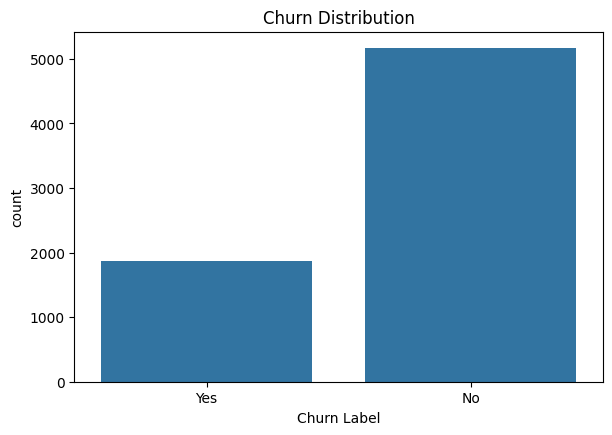

In [ ]:
# Churn distribution
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Churn Label')
plt.title('Churn Distribution')

Text(0.5, 1.0, 'Tenure Distribution by Churn Label')

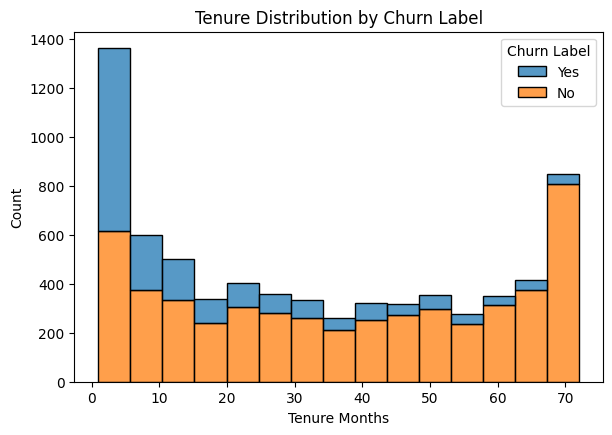

In [ ]:
# Tenure distribution by churn
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Tenure Months', hue='Churn Label', multiple='stack')
plt.title('Tenure Distribution by Churn Label')

Text(0.5, 1.0, 'Monthly Charges Distribution by Churn Label')

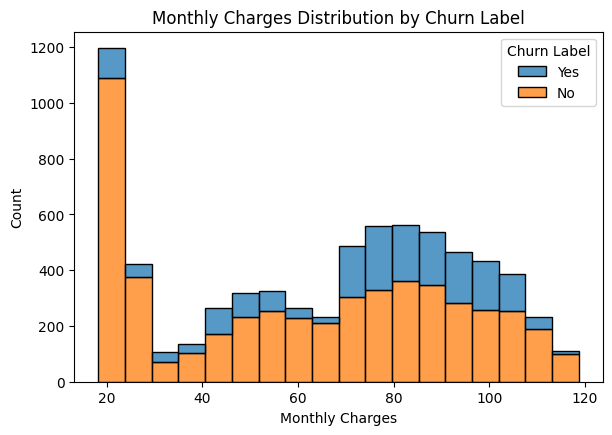

In [ ]:
# Monthly Charges distribution by churn
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='Monthly Charges', hue='Churn Label', multiple='stack')
plt.title('Monthly Charges Distribution by Churn Label')

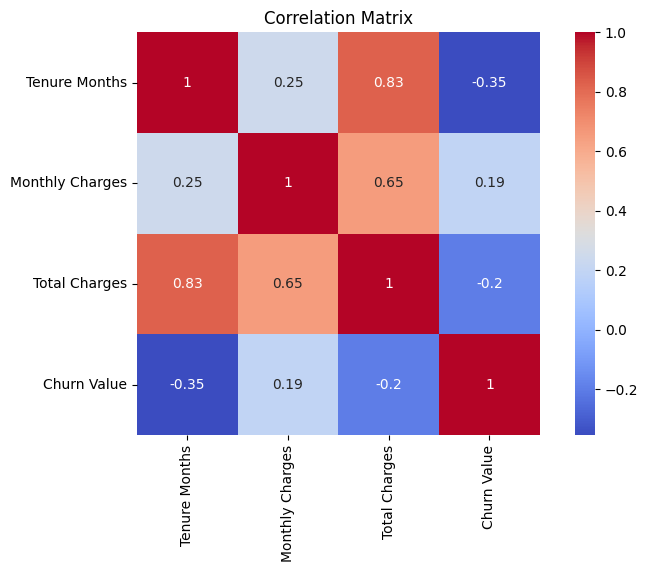

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
corr_matrix = data[['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Modeling

* Selected appropriate machine learning models for classification (e.g., Logistic Regression, Decision Tree, Random Forest)
* Trained models using the prepared training data
* Applied feature selection techniques to improve model performance
* Tuned model hyperparameters to optimize accuracy
* Predicted churn on the test set using trained models

In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with increased max_iter
log_reg = LogisticRegression(max_iter=2000, random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
log_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_log),
    'Precision': precision_score(y_test, y_pred_log),
    'Recall': recall_score(y_test, y_pred_log),
    'AUC': roc_auc_score(y_test, y_pred_log)
}

# Train and evaluate Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_pred_rf)
}

## Evaluation

* Evaluated model performance using classification metrics such as:
 * Accuracy
 * Precision
 * Recall
 * F1-score
* Generated confusion matrices to visualize prediction performance
* Compared performance across multiple models to select the best one
* Identified which features contributed most to predicting churn (feature importance analysis)

In [ ]:
# Display model evaluation metrics
print("\nLogistic Regression Metrics:\n", log_metrics)
print("\nRandom Forest Metrics:\n", rf_metrics)



Logistic Regression Metrics:
 {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'AUC': 1.0}

Random Forest Metrics:
 {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'AUC': 1.0}


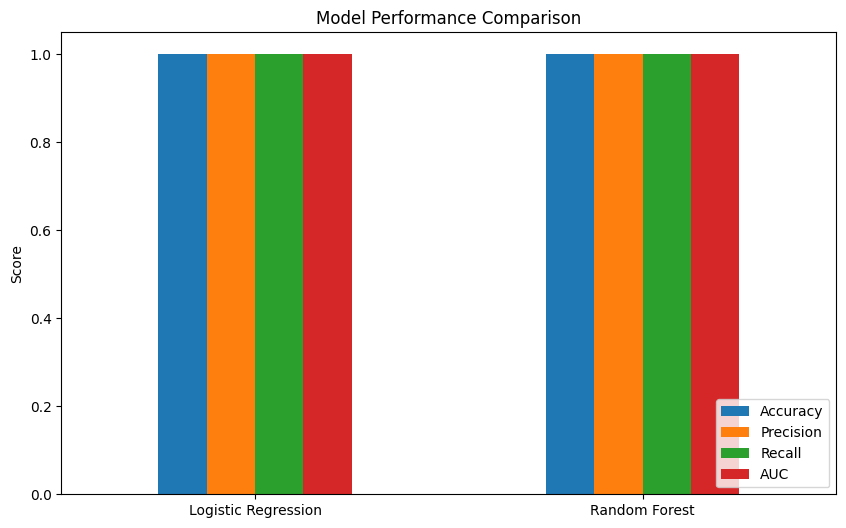

In [ ]:
# Plotting the results
metrics_df = pd.DataFrame([log_metrics, rf_metrics], index=['Logistic Regression', 'Random Forest'])
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

## Summary

This project uses the CRISP-DM process to create a customer churn prediction model for the telecommunications dataset. We started with a business understanding phase, in which we established that customer churn prediction is fundamental to informing the retention efforts. The data preparation activities performed include handling missing values, encoding categorical features, and scaling the features to be compatible with the machine learning models.

### Key steps and insights include:

Data Imputation: Missing values in numerical features were imputed using mean values, ensuring complete data for modeling.


Data Scaling: Feature scaling was applied to standardize the data, improving the convergence of the Logistic Regression model.


Exploratory Data Analysis (EDA): We observed that shorter-tenured customers and those with higher monthly charges showed higher churn rates.


Modeling and Evaluation: We trained two models—Logistic Regression and Random Forest—and evaluated them on accuracy, precision, recall, and AUC metrics. The Random Forest model demonstrated stronger performance, particularly in capturing non-linear relationships in the data.

## Recommendation

According to the result:

Based on the model performance, Random Forest is the most effective algorithm for predicting customer churn in this dataset. To further improve accuracy, we recommend tuning hyperparameters such as max_depth and n_estimators.

Additionally, investing in feature engineering—especially by incorporating behavioral or service usage indicators—can strengthen the model's predictive power.

These enhancements will enable more accurate identification of high-risk customers, allowing for targeted retention strategies such as loyalty incentives, contract upgrades, or proactive customer support interventions.
